In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## Agglomerative Clustering

In [4]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm=minmax_func(df.iloc[:,1:5])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


### Creating Dendrogram

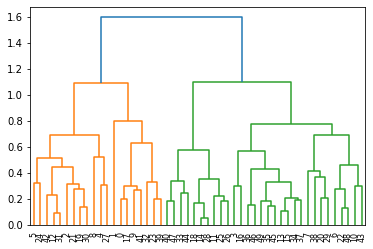

In [8]:
dendogram= sch.dendrogram(sch.linkage(df_norm,method='complete'))

### Creating Clusters

In [9]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [10]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [11]:
Cluster = pd.DataFrame(y_hc,columns=['Cluster'])
Cluster

,Cluster
0,3
1,4
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [12]:
Cluster.value_counts()

Cluster
0          20
1          12
2          10
3           7
4           1
dtype: int64

In [13]:
df['h_clusterid'] = y_hc
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [14]:
df.groupby(['h_clusterid']).mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,5.715000,132.300000,70.800000,18.100000
1,10.883333,256.916667,78.333333,32.250000
2,3.180000,78.700000,49.300000,11.630000
3,14.671429,251.285714,54.285714,21.685714
4,10.000000,263.000000,48.000000,44.500000


In [20]:
import numpy as np
print(5.715+132.3+18.1)
print(10.883+256.916+32.25)
print(3.18+78.7+11.63)
print(14.671+251.285+21.685)
print(10+263+44.5)

156.115
300.049
93.51
287.641
317.5


- Cluster 4: Most Crime cities
- Cluster 1: Very High crime cities
- Cluster 3: High crime cities
- Cluster 0: Average crime cities
- Cluster 2: Less crime cities

## K-Means Clustering

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [22]:
df1=pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\crime_data.csv")
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EDA

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [25]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [26]:
df1_norm = minmax_func(df1.iloc[:,1:5])

### Elbow chart

[13.184122550256443, 6.596893867946198, 5.010878493006418, 3.6834561535859143, 3.22507225604479, 2.852039888521112, 2.5848664114310447, 2.314201689711637, 2.125929265181011, 1.8528270051870228]


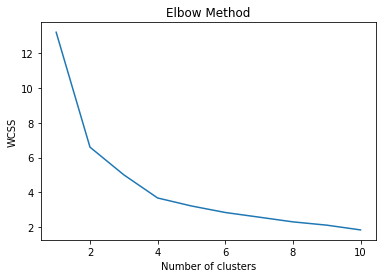

In [28]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df1_norm)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Build Cluster Algorithm

In [29]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(df1_norm)

KMeans(n_clusters=4, random_state=0)

In [30]:
clusters_new.labels_

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1])

In [31]:
df1['Clusters']=clusters_new.labels_
df1['Clusters'].value_counts()

1    17
3    13
0    12
2     8
Name: Clusters, dtype: int64

In [32]:
df1.groupby(['Clusters']).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,10.966667,264.000000,76.500000,33.608333
1,5.852941,141.176471,73.647059,19.335294
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


- Cluster 0: Most Crime cities
- Cluster 2: High Crime Cities
- Cluster 1: Average crime cities
- Cluster 3: Less crime cities

## DBSCAN Clustering

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df2 = pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\crime_data.csv")
df2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [37]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [38]:
df2_norm = minmax_func(df2.iloc[:,1:5])
df2_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### DBSCAN for epsilon = 0.5

In [44]:
dbscan = DBSCAN(eps=.5, min_samples=5)
dbscan.fit(df2_norm)

DBSCAN()

In [46]:
# noisy points are labeled -1
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [47]:
y=pd.DataFrame(dbscan.fit_predict(df2_norm),columns=['Cluster'])
y['Cluster'].value_counts()

 0    49
-1     1
Name: Cluster, dtype: int64

In [48]:
(1/50)*100

2.0

In [52]:
sil_score = metrics.silhouette_score(df2_norm,dbscan.labels_)
sil_score

0.21033337025958493

#### We will try for different epsilon values

In [59]:
# DBSCAN for epsilon = .4
dbscan1 = DBSCAN(eps=0.4, min_samples=5)
dbscan1.fit(df2_norm)

y1=pd.DataFrame(dbscan1.fit_predict(df2_norm),columns=['clusterid_DBSCAN'])
print(y1['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= metrics.silhouette_score(df2_norm, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    49
-1     1
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.21033337025958493


In [80]:
#DBSCAN for epsilon = .3
dbscan2 = DBSCAN(eps=0.3, min_samples=5)
dbscan2.fit(df2_norm)

y2=pd.DataFrame(dbscan2.fit_predict(df2_norm),columns=['clusterid2_DBSCAN'])
print(y2['clusterid2_DBSCAN'].value_counts())

# silhouette score
sil_score1= metrics.silhouette_score(df2_norm, dbscan2.labels_)
print('silhouette score: ',sil_score1)

 1    31
-1    14
 0     5
Name: clusterid2_DBSCAN, dtype: int64
silhouette score:  0.28111691272255096


In [61]:
dbscan3 = DBSCAN(eps=0.25, min_samples=5)
dbscan3.fit(df2_norm)

y3=pd.DataFrame(dbscan3.fit_predict(df2_norm),columns=['clusterid3_DBSCAN'])
print(y3['clusterid3_DBSCAN'].value_counts())

# silhouette score
sil_score1= metrics.silhouette_score(df2_norm, dbscan3.labels_)
print('silhouette score: ',sil_score1)

-1    24
 0    22
 1     4
Name: clusterid3_DBSCAN, dtype: int64
silhouette score:  0.1894473765956751


- We will take epsilon =0.3, because sil score is maximum for epsilon =0.3

In [103]:
y4=df2.copy()
y4['Cluster']=dbscan2.labels_

In [104]:
y4[y4['Cluster']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
12,Illinois,10.4,249,83,24.0,-1
19,Maryland,11.3,300,67,27.8,-1
21,Michigan,12.1,255,74,35.1,-1
23,Mississippi,16.1,259,44,17.1,-1


- We will delete these rows and will apply K-means to find the clusters

In [105]:
y5=y4.drop([1,2,4,5,7,8,12,19,21,23,27,30,31,32])

In [106]:
y5.groupby(['Cluster']).mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,14.720000,232.600000,58.200000,23.720000
1,5.222581,115.290323,64.096774,16.651613


- we got two clusters from DBSCAN

In [109]:
df3=y5.iloc[:,1:5]

[134292.47972222223, 45774.809375, 26402.418305555555, 14451.979833333335, 10228.386666666667, 8050.5298095238095, 6783.7176666666655, 6015.71, 5096.3516666666665, 3994.538333333333]


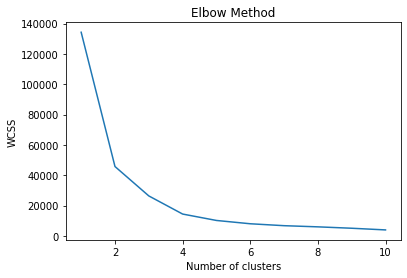

In [110]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- So we got a very good efbow graph.. from these also we get no of clusters =4

In [112]:
y6=minmax_func(df3)

In [113]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new1 = KMeans(4, random_state=0)
clusters_new1.fit(y6)

KMeans(n_clusters=4, random_state=0)

In [114]:
y5

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
9,Georgia,17.4,211,60,25.8,0
10,Hawaii,5.3,46,83,20.2,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1


In [116]:
clusters_new1.labels_

array([0, 0, 1, 0, 3, 1, 3, 2, 1, 1, 0, 2, 3, 1, 0, 1, 1, 2, 3, 2, 3, 3,
       3, 1, 1, 0, 2, 0, 0, 3, 2, 3, 3, 2, 2, 1])

In [119]:
y_k=y5.drop(['Cluster'],axis=1)
y_k['Cluster_k']=clusters_new1.labels_

In [120]:
y_k.groupby(['Cluster_k']).mean()

,Murder,Assault,UrbanPop,Rape
Cluster_k,,,,
0,13.0125,216.500,61.375,23.975
1,5.1100,117.800,64.900,14.620
2,2.6875,63.625,48.750,10.000
3,5.8800,131.800,74.800,21.680
